In [1]:
#We first import all the required libraries
import pandas as pd
import numpy as np
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#This code reads data from the 'AB_NYC_2019.csv' file into a Pandas DataFrame and displays the first 5 rows of the DataFrame.
df = pd.read_csv('AB_NYC_2019.csv')

# First 5 rows of the DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.shape

(48895, 16)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [5]:
#name cleaning 
#This code converts the 'name,' 'neighbourhood,' and 'neighbourhood_group' columns of the DataFrame to lowercase.
df['name']=df['name'].str.lower()
df['neighbourhood']=df['neighbourhood'].str.lower()
df['neighbourhood_group']=df['neighbourhood_group'].str.lower()

In [6]:
#This code displays the first 5 rows of the DataFrame 'df' after the previous lowercase text transformation.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean & quiet apt home by the park,2787,John,brooklyn,kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit midtown castle,2845,Jennifer,manhattan,midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the village of harlem....new york !,4632,Elisabeth,manhattan,harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,cozy entire floor of brownstone,4869,LisaRoxanne,brooklyn,clinton hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire apt: spacious studio/loft by central park,7192,Laura,manhattan,east harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
result = df[df['host_id'] == 622460]

result.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
395,125053,⚡quiet gem w/roof deck on ny's hottest street⚡,622460,Justin,manhattan,east village,40.72533,-73.99143,Entire home/apt,395,2,70,2019-07-01,0.73,1,170


In [8]:
#This code removes unwanted characters (non-alphanumeric and non-space characters) from the 'name' column in the DataFrame 'df' using regular expressions.
pattern = r'[^a-zA-Z0-9\s]+'
df['name'] = df['name'].str.replace(pattern, '')

C:\Users\SARVESH\AppData\Local\Temp\ipykernel_16696\3041786052.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['name'] = df['name'].str.replace(pattern, '')


In [9]:
#after
result = df[df['host_id'] == 622460]

result.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
395,125053,quiet gem wroof deck on nys hottest street,622460,Justin,manhattan,east village,40.72533,-73.99143,Entire home/apt,395,2,70,2019-07-01,0.73,1,170


In [10]:
#conversion to appropriate datetime formatWe can see that 'last_review' column contains dates, but it's type is object. There is a need to change it to a datetime data type. It'll allow to perform calculations on the dates.¶
df['last_review'] = pd.to_datetime(df['last_review'])

In [11]:
#This code converts the 'neighbourhood_group,' 'neighbourhood,' and 'room_type' columns in the DataFrame 'df' to categorical variables.
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['room_type'] = df['room_type'].astype('category')

In [12]:
df['neighbourhood_group'].values

['brooklyn', 'manhattan', 'manhattan', 'brooklyn', 'manhattan', ..., 'brooklyn', 'brooklyn', 'manhattan', 'manhattan', 'manhattan']
Length: 48895
Categories (5, object): ['bronx', 'brooklyn', 'manhattan', 'queens', 'staten island']

In [13]:
#Displaying the dtatypes of each feature
df.dtypes


id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [14]:
#he expression df.duplicated().sum() is used to count the number of duplicate rows in a pandas DataFrame df.
df.duplicated().sum()

0

In [15]:
#This code checks the dataset for null values and returns the sum of all the missing values for each feature.
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
df.fillna({'name': 'N/A'}, inplace=True)

In [17]:
df.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,clean quiet apt home by the park,2787,brooklyn,kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,skylit midtown castle,2845,manhattan,midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,the village of harlemnew york,4632,manhattan,harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,cozy entire floor of brownstone,4869,brooklyn,clinton hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,entire apt spacious studioloft by central park,7192,manhattan,east harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [18]:
#This code fills missing values in the 'reviews_per_month' column of the DataFrame 'df' with the value 0, and the changes are applied in place.
df.fillna({'reviews_per_month': 0}, inplace=True)

In [19]:
df.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [20]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [21]:
outlier_cols = [
    'price', 'minimum_nights', 'number_of_reviews', 
    'reviews_per_month', 'calculated_host_listings_count'
]

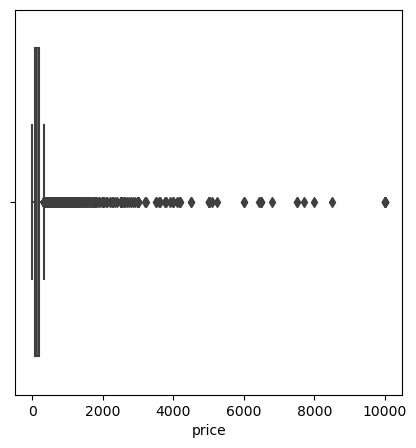

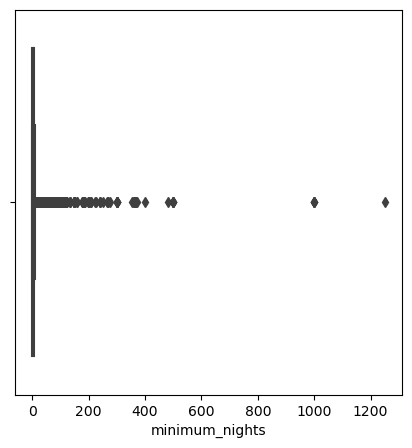

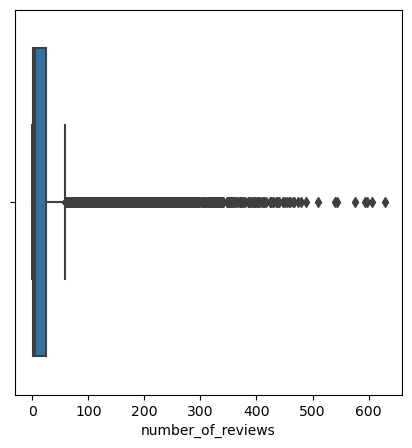

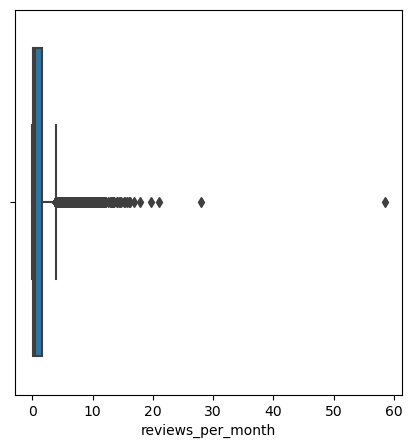

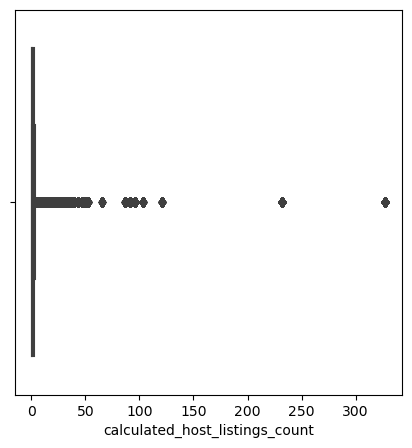

In [22]:
#This code generates boxplots for each column specified in the 'outlier_cols' list using Seaborn and Matplotlib, displaying them one by one.
for col in outlier_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df[col])
    plt.show()

In [23]:
# This code selects numeric columns from the DataFrame 'df,' calculates the z-scores for each numeric column, 
# and identifies and prints the number of outliers in each column where z-scores exceed a threshold of 3.
# Select numeric columns
df_numeric = df.select_dtypes(include=[np.number])

for col in df_numeric.columns:
    # Calculate z-score of the column
    z_score = np.abs(stats.zscore(df[col]))
    outliers_num = len(np.where(z_score > 3)[0])
    if outliers_num:
        print('{}: {}'.format(col, outliers_num))

latitude: 99
longitude: 1236
price: 388
minimum_nights: 327
number_of_reviews: 1221
reviews_per_month: 847
calculated_host_listings_count: 680


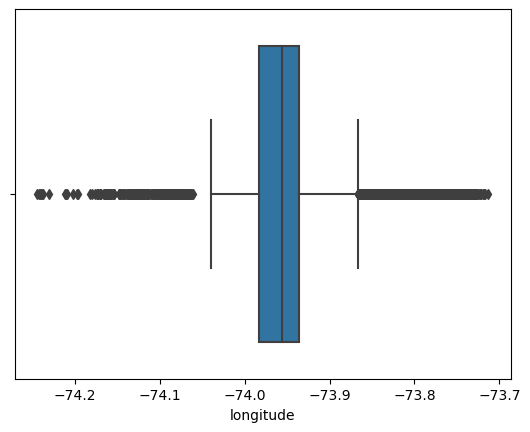

In [24]:
#This code creates a boxplot using Seaborn to visualize the distribution of the 'longitude' column in the DataFrame 'df.'
sns.boxplot(x=df['longitude']);

In [25]:
#This code calculates z-scores for all numeric columns in the DataFrame 'df_numeric,' and then creates a new DataFrame 'df_wo_outliers' by filtering out rows where all z-scores are less than 3, effectively removing outliers.
z_scores = np.abs(stats.zscore(df_numeric))

# DataFrame without outliers
df_wo_outliers = df[(z_scores < 3).all(axis=1)]
df_wo_outliers.shape

(44475, 13)

# Exploratory Data Analysis


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [27]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,clean quiet apt home by the park,2787,brooklyn,kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,skylit midtown castle,2845,manhattan,midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,the village of harlemnew york,4632,manhattan,harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,cozy entire floor of brownstone,4869,brooklyn,clinton hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,entire apt spacious studioloft by central park,7192,manhattan,east harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [28]:
df.tail()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,charming one bedroom newly renovated rowhouse,8232441,brooklyn,bedford-stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.0,2,9
48891,affordable room in bushwickeast williamsburg,6570630,brooklyn,bushwick,40.70184,-73.93317,Private room,40,4,0,0.0,2,36
48892,sunny studio at historical neighborhood,23492952,manhattan,harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.0,1,27
48893,43rd st time squarecozy single bed,30985759,manhattan,hell's kitchen,40.75751,-73.99112,Shared room,55,1,0,0.0,6,2
48894,trendy duplex in the very heart of hells kitchen,68119814,manhattan,hell's kitchen,40.76404,-73.98933,Private room,90,7,0,0.0,1,23


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   name                            48895 non-null  object  
 1   host_id                         48895 non-null  int64   
 2   neighbourhood_group             48895 non-null  category
 3   neighbourhood                   48895 non-null  category
 4   latitude                        48895 non-null  float64 
 5   longitude                       48895 non-null  float64 
 6   room_type                       48895 non-null  category
 7   price                           48895 non-null  int64   
 8   minimum_nights                  48895 non-null  int64   
 9   number_of_reviews               48895 non-null  int64   
 10  reviews_per_month               48895 non-null  float64 
 11  calculated_host_listings_count  48895 non-null  int64   
 12  availability_365  

In [30]:
df.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], dtype='object')

In [31]:
df.index

RangeIndex(start=0, stop=48895, step=1)

In [32]:
#This code defines a Python function called grab_col_names that analyzes the columns in a DataFrame, categorizes them into different types (categorical, numerical, etc.), and returns these categorized column lists.
def grab_col_names(dataframe, cat_th=10, car_th=20 ):
        cat_cols = [ col for col in df.columns if str(df[col].dtype) in ["category", "object", "bool"]]
        num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int64","float64"]]
        cat_but_car = [col for col in df.columns if
                       df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
        cat_cols = cat_cols + num_but_cat
        cat_cols = [col for col in cat_cols if col not in cat_but_car]


        num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
        num_cols = [col for col in num_cols if col not in [cat_cols]]


        print(f"Observations: {dataframe.shape[0]}")    
        print(f"Variables:{dataframe.shape[1]}")           
        print(f"cat_cols:{len(cat_cols)}")
        print(f"num_cols:{len(num_cols)}")
        print(f"cat_but_car:{len(cat_but_car)}")
        print(f"num_but_cat:{len(num_but_cat)}")

        return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 48895
Variables:13
cat_cols:2
num_cols:3
cat_but_car:2
num_but_cat:0


In [33]:
cat_cols

['neighbourhood_group', 'room_type']

In [34]:
num_cols

['latitude', 'longitude', 'reviews_per_month']

In [35]:
cat_but_car

['name', 'neighbourhood']

In [36]:
#This code defines a function called target_summary_with_cat to calculate and print the mean of the 'price' column for each unique value in a specified categorical column. It then applies this function to all categorical columns in the DataFrame 'df' with the target variable 'price.'
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}),end="n\n\n")
    
for col in cat_cols:
    target_summary_with_cat(df, "price", col)

                     TARGET_MEAN
neighbourhood_group             
bronx                  87.496792
brooklyn              124.383207
manhattan             196.875814
queens                 99.517649
staten island         114.812332n

                 TARGET_MEAN
room_type                   
Entire home/apt   211.794246
Private room       89.780973
Shared room        70.127586n



In [37]:
na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
n_miss_ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
n_miss_ratio

Series([], dtype: float64)

In [38]:
np.round((df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False), 2)

Series([], dtype: float64)

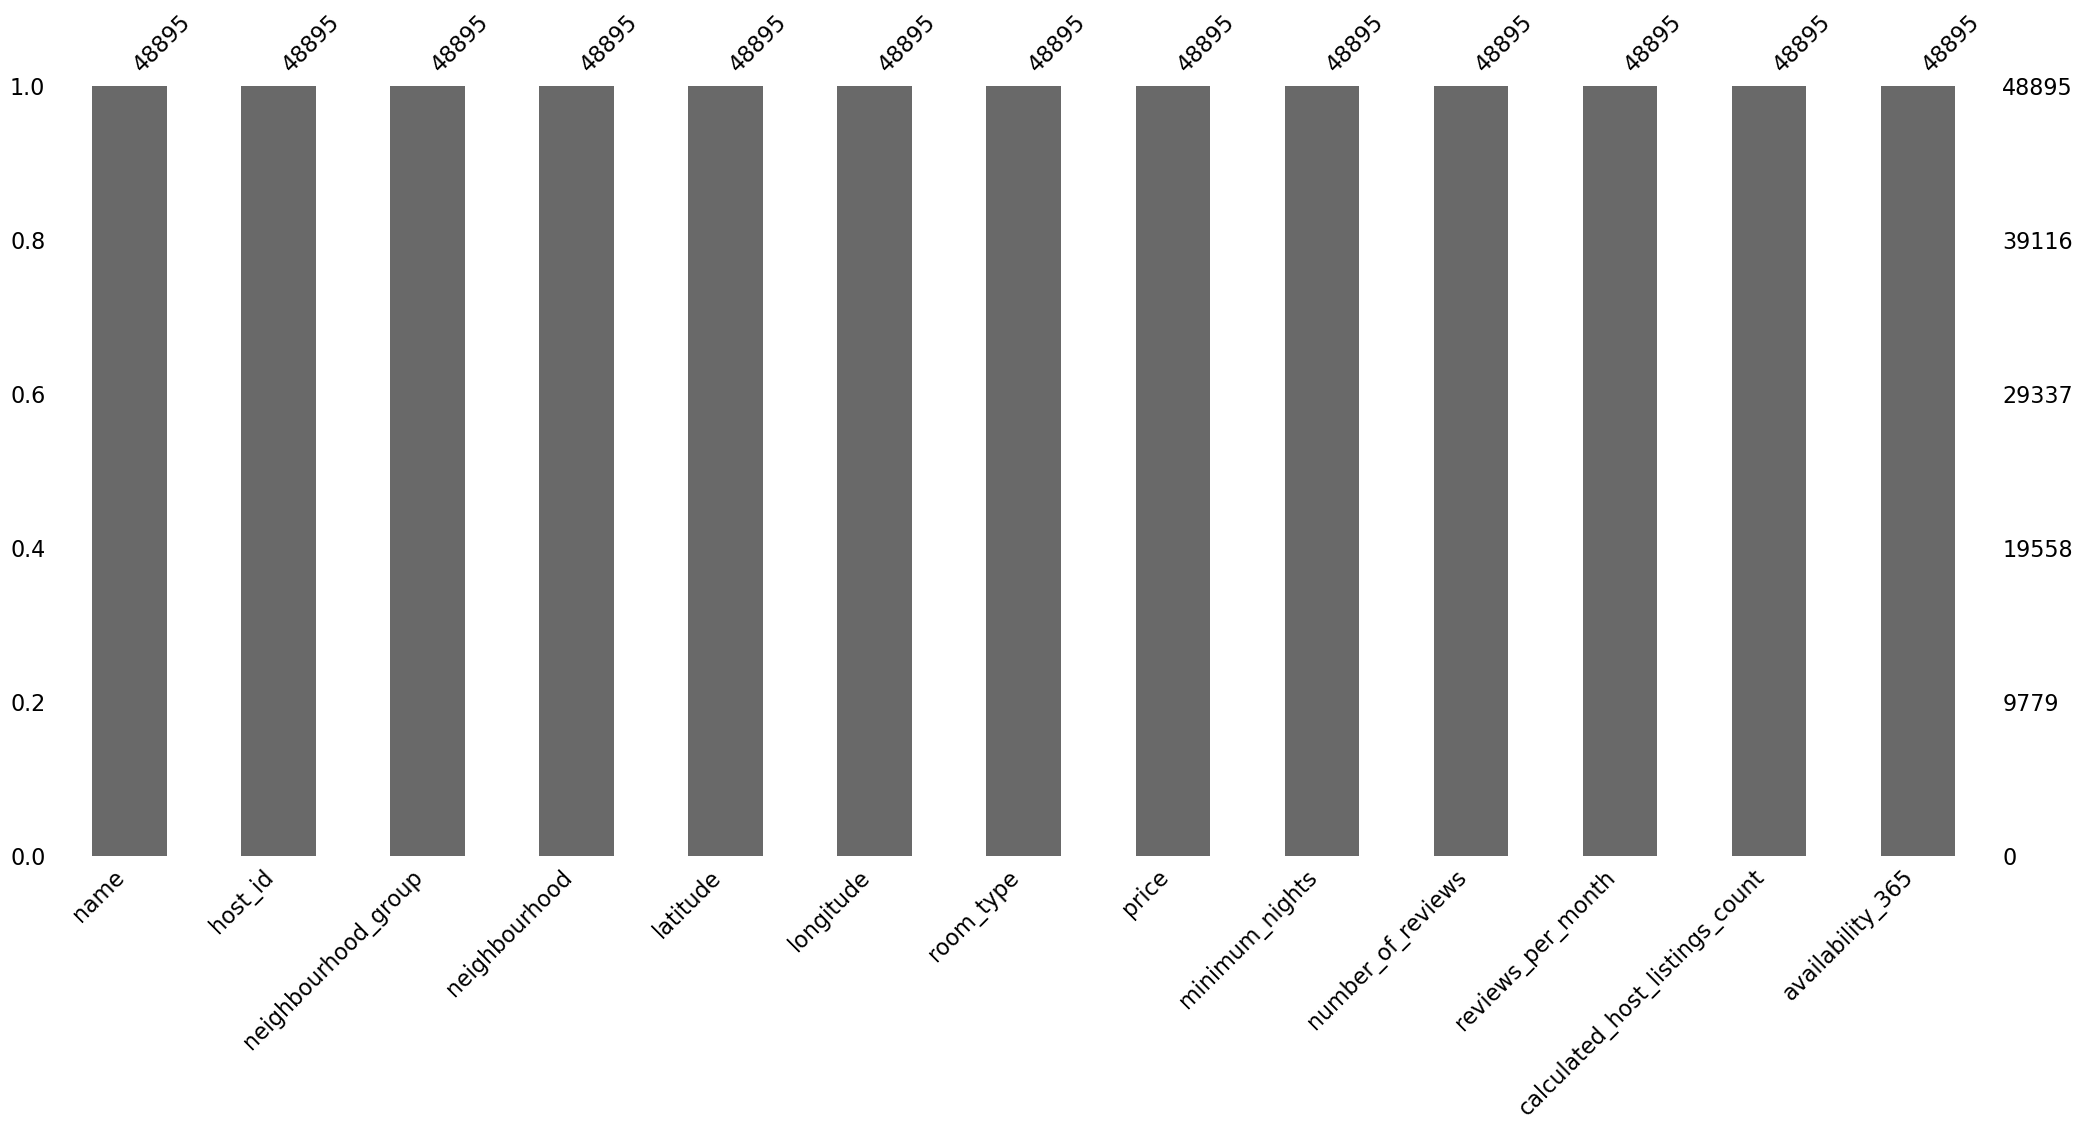

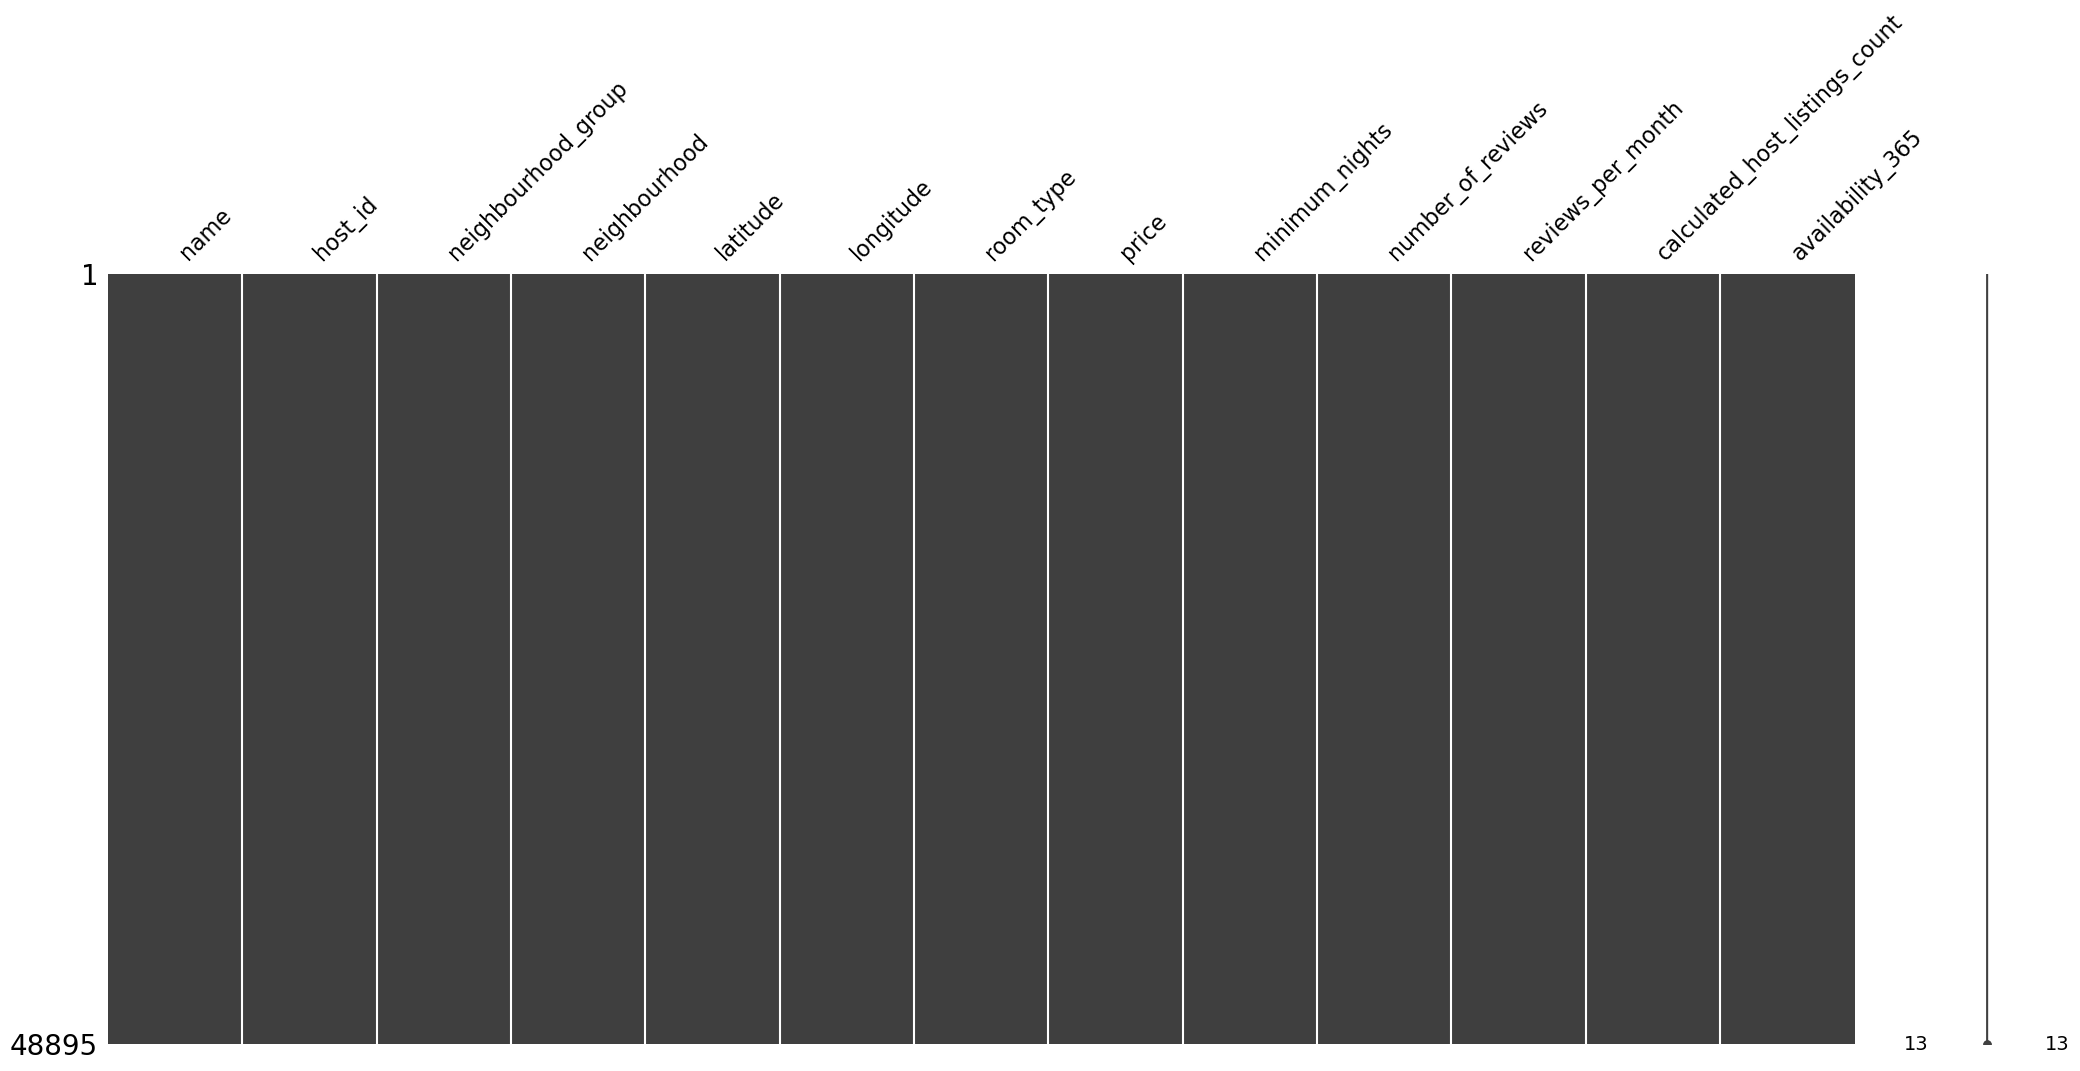

In [39]:
msno.bar(df)
plt.show()

msno.matrix(df)
plt.show()

In [40]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,clean quiet apt home by the park,2787,brooklyn,kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,skylit midtown castle,2845,manhattan,midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,the village of harlemnew york,4632,manhattan,harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,cozy entire floor of brownstone,4869,brooklyn,clinton hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,entire apt spacious studioloft by central park,7192,manhattan,east harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


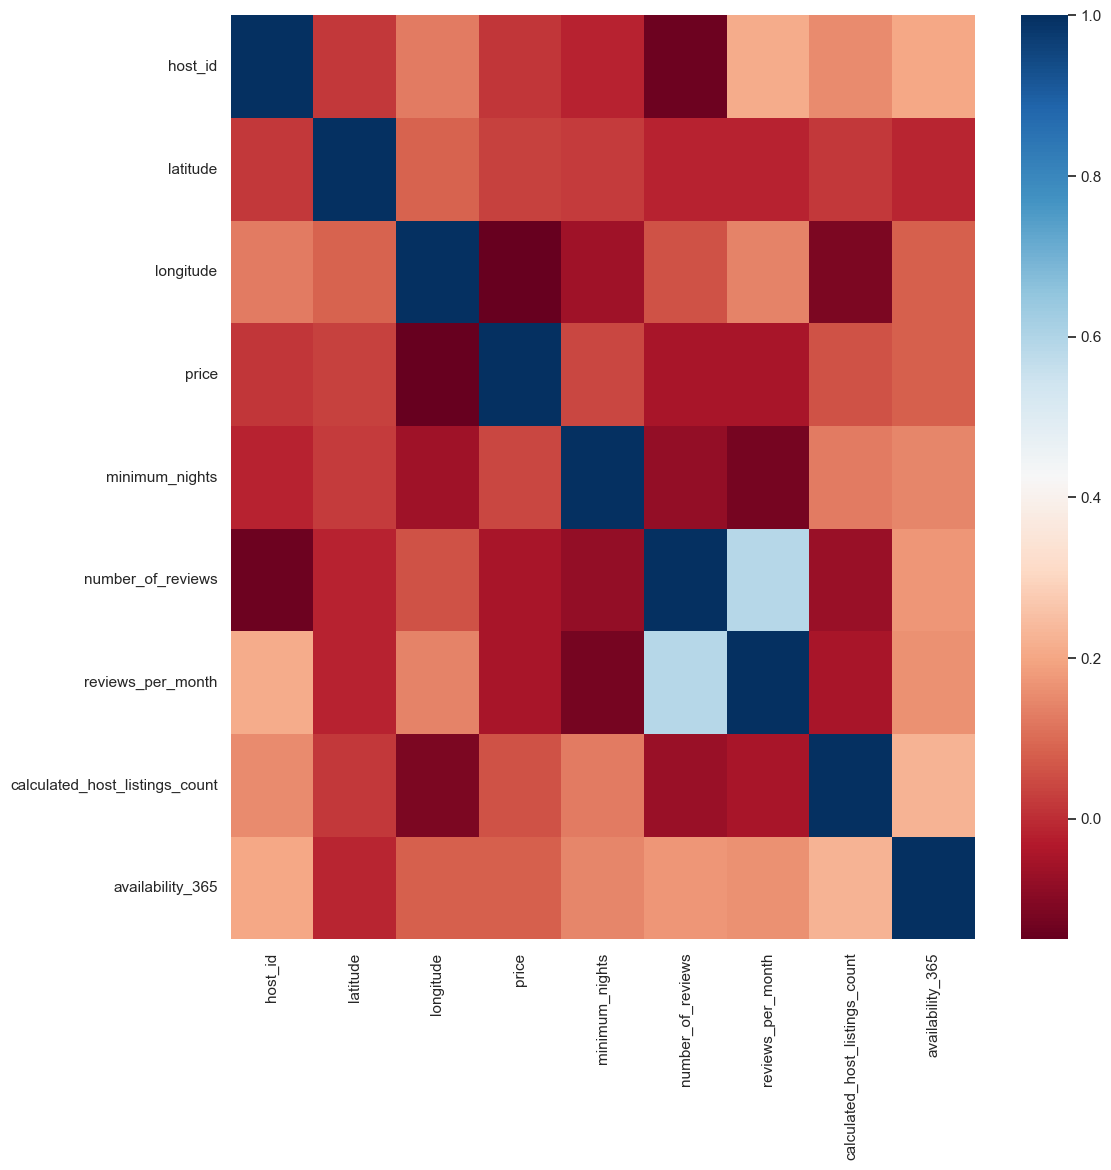

In [41]:
corr = df.corr(numeric_only=True)

#create a heatmap.

sns.set(rc = {'figure.figsize': (12, 12)})       
sns.heatmap(corr, cmap = "RdBu")              
plt.show()

In [42]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = df.corr(numeric_only = True)
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list

high_correlated_cols(df)

[]

Text(0.5, 1.0, 'Neighbourhood Group')

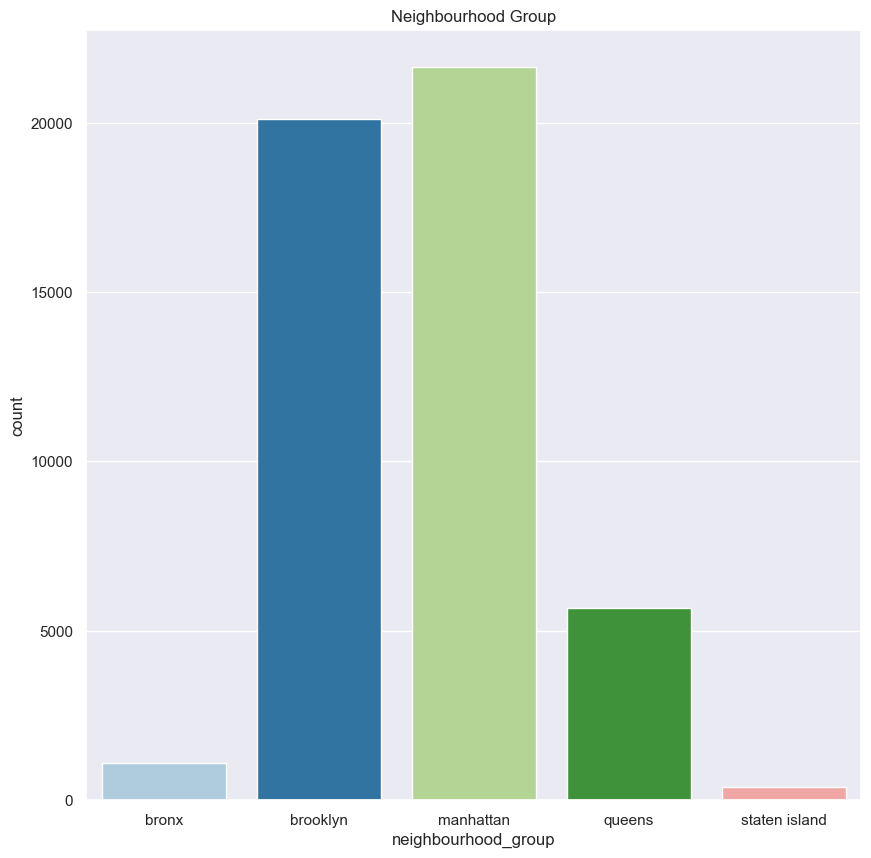

In [43]:
sns.countplot(x = df['neighbourhood_group'], palette="Paired")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

In [44]:
df.groupby(['neighbourhood_group','room_type'])['price'].mean().sort_values(ascending=False)

neighbourhood_group  room_type      
manhattan            Entire home/apt    249.239109
brooklyn             Entire home/apt    178.327545
staten island        Entire home/apt    173.846591
queens               Entire home/apt    147.050573
bronx                Entire home/apt    127.506596
manhattan            Private room       116.776622
                     Shared room         88.977083
brooklyn             Private room        76.500099
queens               Private room        71.762456
                     Shared room         69.020202
bronx                Private room        66.788344
staten island        Private room        62.292553
bronx                Shared room         59.800000
staten island        Shared room         57.444444
brooklyn             Shared room         50.527845
Name: price, dtype: float64

<Figure size 1000x1000 with 0 Axes>

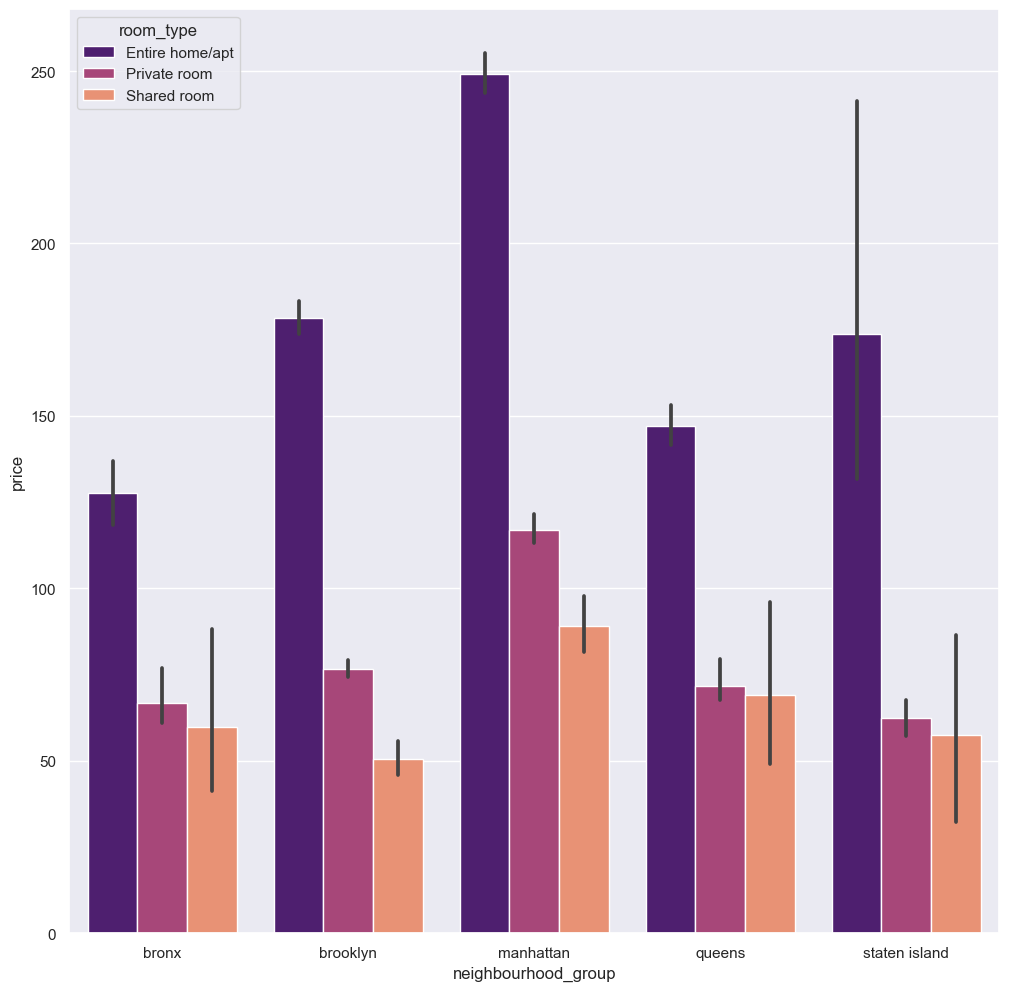

<Figure size 1000x1000 with 0 Axes>

In [45]:
sns.barplot(x ='neighbourhood_group',y = 'price' ,hue = 'room_type' ,data = df, palette ="magma")
plt.figure(figsize=(10, 10))

In [46]:
top10_host = df.host_id.value_counts().head(10).index
top10_host_vis=df.loc[df['host_id'].isin(top10_host)]
top10_host

Int64Index([219517861, 107434423, 30283594, 137358866, 16098958, 12243051, 61391963, 22541573, 200380610, 7503643], dtype='int64')

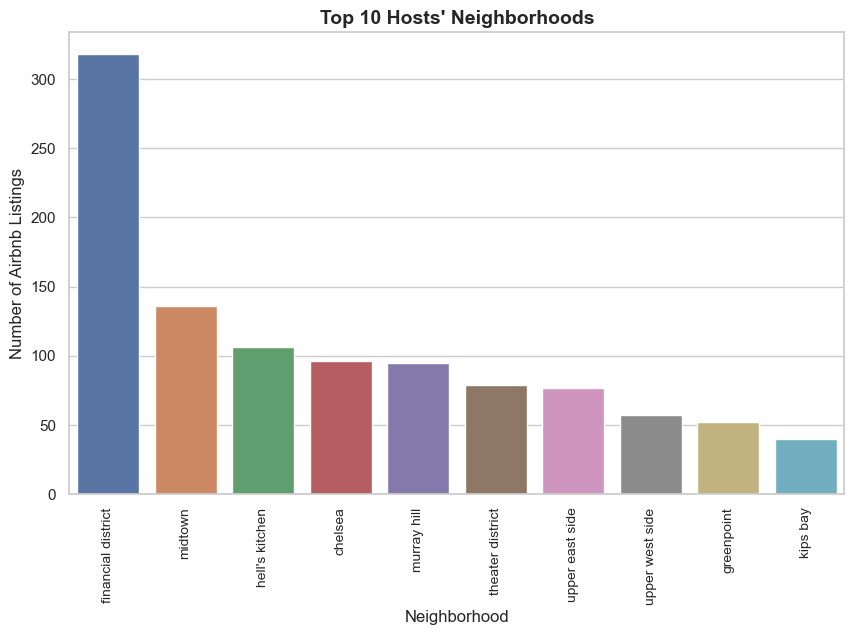

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the neighborhoods by their count and select the top 10
top10_neighborhoods = top10_host_vis['neighbourhood'].value_counts().index[:10]

# Filter the data to include only the top 10 neighborhoods
top10_data = top10_host_vis[top10_host_vis['neighbourhood'].isin(top10_neighborhoods)]

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the countplot with the filtered data
sns.countplot(data=top10_data, x='neighbourhood', order=top10_neighborhoods)

plt.xticks(rotation=90, fontsize=10)
plt.title("Top 10 Hosts' Neighborhoods", weight='bold', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Airbnb Listings', fontsize=12)

plt.show()


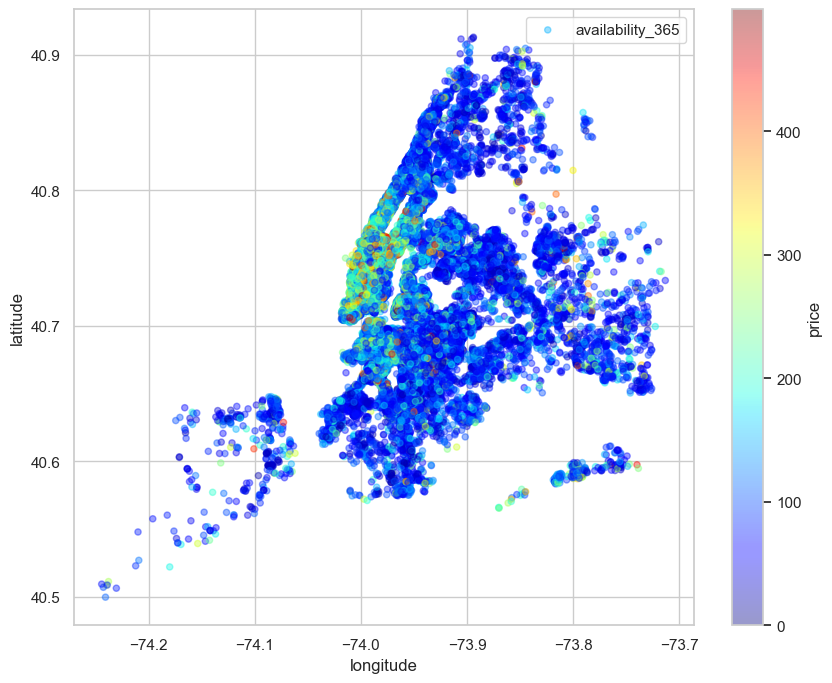

In [48]:
avaibility = df[df.price < 500].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
avaibility.legend()

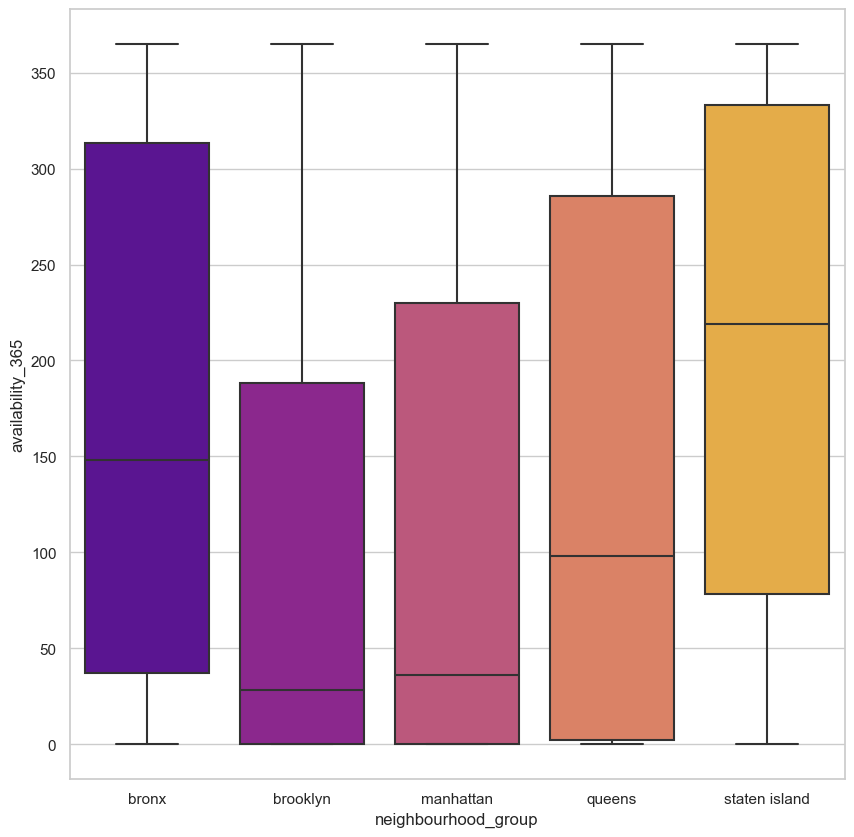

In [49]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')

In [50]:
df.groupby('room_type').agg( {'minimum_nights': lambda minimum_nights: minimum_nights.sum()})

,minimum_nights
room_type,
Entire home/apt,216152
Private room,120067
Shared room,7511


In [51]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,clean quiet apt home by the park,2787,brooklyn,kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,skylit midtown castle,2845,manhattan,midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,the village of harlemnew york,4632,manhattan,harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,cozy entire floor of brownstone,4869,brooklyn,clinton hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,entire apt spacious studioloft by central park,7192,manhattan,east harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


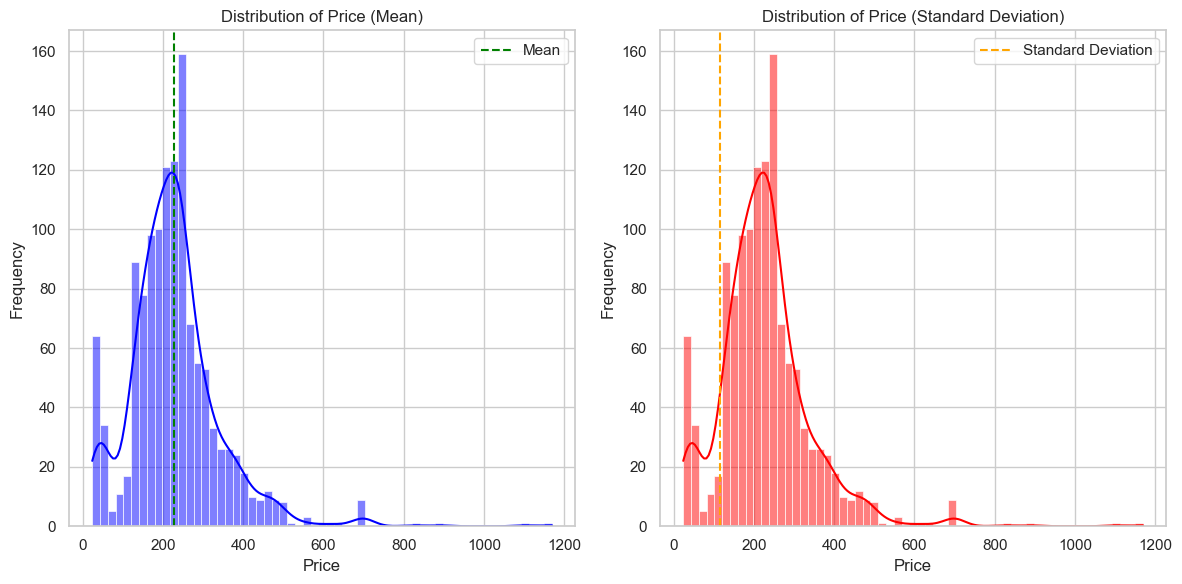

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called 'top10_host_vis' with a 'price' column

# Calculate mean and standard deviation of the 'price' column
mean_price = top10_host_vis['price'].mean()
std_price = top10_host_vis['price'].std()

# Create subplots for mean and standard deviation distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution of mean price
sns.histplot(top10_host_vis['price'], kde=True, color='blue', ax=axes[0])
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Price (Mean)')

# Plot the distribution of standard deviation
sns.histplot(top10_host_vis['price'], kde=True, color='red', ax=axes[1])
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Price (Standard Deviation)')

# Add vertical lines to show the mean and standard deviation
axes[0].axvline(x=mean_price, color='green', linestyle='--', label='Mean')
axes[1].axvline(x=std_price, color='orange', linestyle='--', label='Standard Deviation')

# Add legends
axes[0].legend()
axes[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()